# Importing data

In [1]:
import pandas as pd
import pyarrow.parquet as pq
from pathlib import Path

In [2]:
path_to_parquet_data = Path('./data/infl-en-dde')

df1 = pq.read_table(path_to_parquet_data / 'df1e.parquet').to_pandas()
df2 = pq.read_table(path_to_parquet_data / 'df2e.parquet').to_pandas()
df3 = pq.read_table(path_to_parquet_data / 'df3e.parquet').to_pandas()
df4 = pq.read_table(path_to_parquet_data / 'df4e.parquet').to_pandas()
df5 = pq.read_table(path_to_parquet_data / 'df5e.parquet').to_pandas()

# Filtering and joining

In [3]:
no_retweets_mask = df1['retweetbody'].isnull()
df1 = df1[no_retweets_mask]

In [5]:
df1 = df1.merge(df4, how='left', left_on='id', right_on='id')

In [6]:
df1

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime_x,retweetcount,favoritescount,generator,locationname,locationcode,hashtag,postedtime_y
0,"tag:search.twitter.com,2005:1000121300550062080",post,id:twitter.com:507547334,None,http://twitter.com/Bill_Dykes/statuses/1000121...,Heading into the Memorial Day weekend those in...,None,2018-05-25,2018-05-25T21:07:54.000Z,0,0.0,LinkedIn,None,None,NaN,NaN
1,"tag:search.twitter.com,2005:1000138945731031040",post,id:twitter.com:223565922,None,http://twitter.com/SoPhillyFred/statuses/10001...,Retweeted Ron Paul (@RonPaul):\n\nInflation is...,None,2018-05-25,2018-05-25T22:18:01.000Z,0,0.0,Facebook,None,None,NaN,NaN
2,"tag:search.twitter.com,2005:1000149645920735232",post,id:twitter.com:1252224511,None,http://twitter.com/EnergyPhilFlynn/statuses/10...,"Oil prices fall on talk of hike in production,...",None,2018-05-25,2018-05-25T23:00:32.000Z,0,0.0,Twitter Web Client,None,None,GoogleAlerts,2018-05-25
3,"tag:search.twitter.com,2005:1000562796646428673",post,id:twitter.com:992334290,None,http://twitter.com/JeanSwenson2/statuses/10005...,Gas prices up 60 cents over a year ago. And i...,None,2018-05-27,2018-05-27T02:22:14.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
4,"tag:search.twitter.com,2005:1001436242440085504",post,id:twitter.com:21130921,None,http://twitter.com/WFAE/statuses/1001436242440...,"To Lower Your Medicare Drug Costs, Ask Your Ph...",None,2018-05-29,2018-05-29T12:13:00.000Z,0,0.0,Buffer,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961059,"tag:search.twitter.com,2005:998012788177014784",post,id:twitter.com:1942726112,None,http://twitter.com/ScottRiff/statuses/99801278...,Gasoline prices have been rising at a furious ...,None,2018-05-20,2018-05-20T01:29:25.000Z,0,0.0,Twitter Web Client,None,None,NaN,NaN
961060,"tag:search.twitter.com,2005:998627744371134464",post,id:twitter.com:382381310,None,http://twitter.com/gregorymay1/statuses/998627...,Stock news Today I will buy a small amount to ...,None,2018-05-21,2018-05-21T18:13:02.000Z,0,0.0,Twitter for iPad,Bardonia,US,NaN,NaN
961061,"tag:search.twitter.com,2005:998646409485316097",post,id:twitter.com:20015855,None,http://twitter.com/Smart_Realtor/statuses/9986...,Prices will likely be even higher near the end...,None,2018-05-21,2018-05-21T19:27:12.000Z,0,0.0,InStockSocial,None,None,NaN,NaN
961062,"tag:search.twitter.com,2005:999387232157876224",post,id:twitter.com:877585625876221953,None,http://twitter.com/FeedYouDeals/statuses/99938...,Wolfgang Puck High-Performance Com...: List Pr...,None,2018-05-23,2018-05-23T20:30:58.000Z,0,0.0,dlvr.it,None,None,NaN,NaN


# Data cleaning

In [7]:
from dde.preprocessing.cleaning import data_preprocessing
from tqdm import tqdm

tqdm.pandas()


df1_cleaned = df1.copy()
df1_cleaned['body'] = df1['body'].progress_apply(lambda x: data_preprocessing(x))

100%|██████████| 961064/961064 [00:25<00:00, 38311.85it/s]


This tokenize and lemmatize the body of the tweets, but don't run it since it takes quite a lot of time.

In [9]:
from dde.preprocessing.nltk_processing import remove_stopwords, lemmatize
from tqdm import tqdm
tqdm.pandas()

# df1_lemmatized = df1_cleaned.copy()
# tokenize, lemmatize and remove the stopwords of the tweers
# df1_lemmatized['body'] = df1_cleaned['body'].progress_apply(lambda x: lemmatize(x))
# df1_lemmatized['body'] = df1_lemmatized['body'].progress_apply(lambda x: remove_stopwords(x))

**QUESTO STA QUA PERCHÈ È LUNGO RIRUNNARE LE FUNZIONI SOPRA**

In [11]:
df1_lemmatized = pd.read_csv('data/tokenized_lemmatized_df1/df1_lemmatized.csv')

In [12]:
df1_lemmatized = pd.read_csv("data/tokenized_lemmatized_df1/df1_lemmatized.csv", converters={"body": lambda x: x.strip("[]").replace("'","").split(", ")}, index_col=0)

**BOTS AND PROFESSIONALS**

# Vectorization

In [14]:
from tqdm import tqdm

tqdm.pandas()

In [15]:
text_corpus = df1_lemmatized['body'].progress_apply(lambda x: ' '.join(x))

100%|██████████| 866654/866654 [00:00<00:00, 1043961.82it/s]


In [16]:
complete_text_corpus = text_corpus.str.cat(sep=', ')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# text_corpus = ... here the full body of tweets ...
vectorizer.fit(text_corpus)

CountVectorizer()

In [18]:
# X is the feature matrix it has number of rows equal to the number of tweets and columns equal to the features
X = vectorizer.transform(text_corpus)

## PREPARING THE DATA TO BUILD THE GRAPH

In [20]:
#Dataset containing the tweets with the hashtags
df1_hashtags = df1['hashtag'].dropna().apply(lambda x: x.lower())

#Filter the df1 based on the df with the hashtags
df1_only_hashtags = df1.loc[df1_hashtags.index]
df1_only_hashtags['hashtag'] = df1_only_hashtags['hashtag'].apply(lambda x: x.lower())

# Put in a list all the hashtags in a tweet and take the unique id of the tweet. we do this in order to form the community 
df1_aggr = df1.copy()
df1_aggr = df1_only_hashtags.groupby(['id'])[
    ['hashtag']].agg(lambda x: list(x)).reset_index()

<generator object isolates.<locals>.<genexpr> at 0x7fc2f4afb140>

# Building the Graph

In [21]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(df1_hashtags.to_list())
nx.isolates(G)
G.nodes

In [23]:
# def add_edges_to_graph(df1_aggr,G):
#     for row in df1_aggr['hashtag']:
#         if type(row) == str or str(row[0]) == 'nan':
#             ...
#         else:
#             for x in itertools.combinations(row, 2):

#                 if not G.has_edge(x[0], x[1]):
#                     G.add_edge(x[0], x[1])
#                     #   print('first if: ', x)
#                     G[x[0]][x[1]]['weight'] = 1
#                 else:

#                     G[x[0]][x[1]]['weight'] += 1
        # return

In [ ]:
graph_functions.add_edges_to_graph(df1_aggr,G)
G.edges

In [26]:
# sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)

# # REMOVE FROM THE GRAPH THE LESS CONNECTED COMUNITIES 
# def less_connected_comunities(G,threshold = 5):
#     long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
#     le_ids = list(e[:2] for e in long_edges)

#     # remove filtered edges from graph G
#     G.remove_edges_from(le_ids)
#     G.remove_nodes_from(list(nx.isolates(G)))

In [28]:
graph_functions.less_connected_comunities(G,threshold = 5)
print(len(G.nodes))
print(len(G.edges))

2099
4551


## Detecting the communities

In [29]:
import networkx.algorithms.community as nx_comm

comm = nx_comm.louvain_communities(G, resolution=1, seed=123)

# take only the communities that are larger than 5
communities = [community for community in comm if len(community) > 5]

In [30]:
# def given_hashtag_return_community(hashtags, communities = communities):
#     for hashtag in set(hashtags):
#         for community in communities:
#             if hashtag in community:
#                 return communities.index(community)

`labels` is the matrix that contains the community identification for each tweet

In [32]:
# def create_labels_matrix(df1_aggr):
#     #Initialize the labels matrix 
#     labels = [[] for x in range(0, len(df1_lemmatized))]
#     for id, row in df1_aggr.iterrows():
#         community_index = graph_functions.given_hashtag_return_community(row['hashtag'])
#         if community_index:
#             labels[id].append(community_index)
#     return labels

In [ ]:
labels = graph_functions.create_labels_matrix(df1_aggr)

# TOPIC MODELING

### TSNMF

In [35]:
from tsnmf import TSNMF

n_components = len(communities)
tsnmf = TSNMF(n_components=n_components, random_state=1)
W = tsnmf.fit(X, labels=labels) # document X topic_matrix
# H = tsnmf.components_

In [36]:
# def plot_top_words(model, feature_names, n_top_words, title):
#     fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
#     axes = axes.flatten()
#     for topic_idx, topic in enumerate(model.components_):
#         top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         weights = topic[top_features_ind]

#         ax = axes[topic_idx]
#         ax.barh(top_features, weights, height=0.7)
#         ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
#         ax.invert_yaxis()
#         ax.tick_params(axis="both", which="major", labelsize=20)
#         for i in "top right left".split():
#             ax.spines[i].set_visible(False)
#         fig.suptitle(title, fontsize=40)

#     plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
#     plt.show()

Below we plot the words that most represent each topic

In [ ]:
feat_names = vectorizer.get_feature_names_out()
n_top_words = 10
plot_top_words(tsnmf, feat_names, n_top_words, 'Topics')

## LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = n_components,
                                random_state=1,
                                verbose=7,
                                n_jobs=12)

res_lda = lda.fit(X)

IndexError: index 10 is out of bounds for axis 0 with size 10

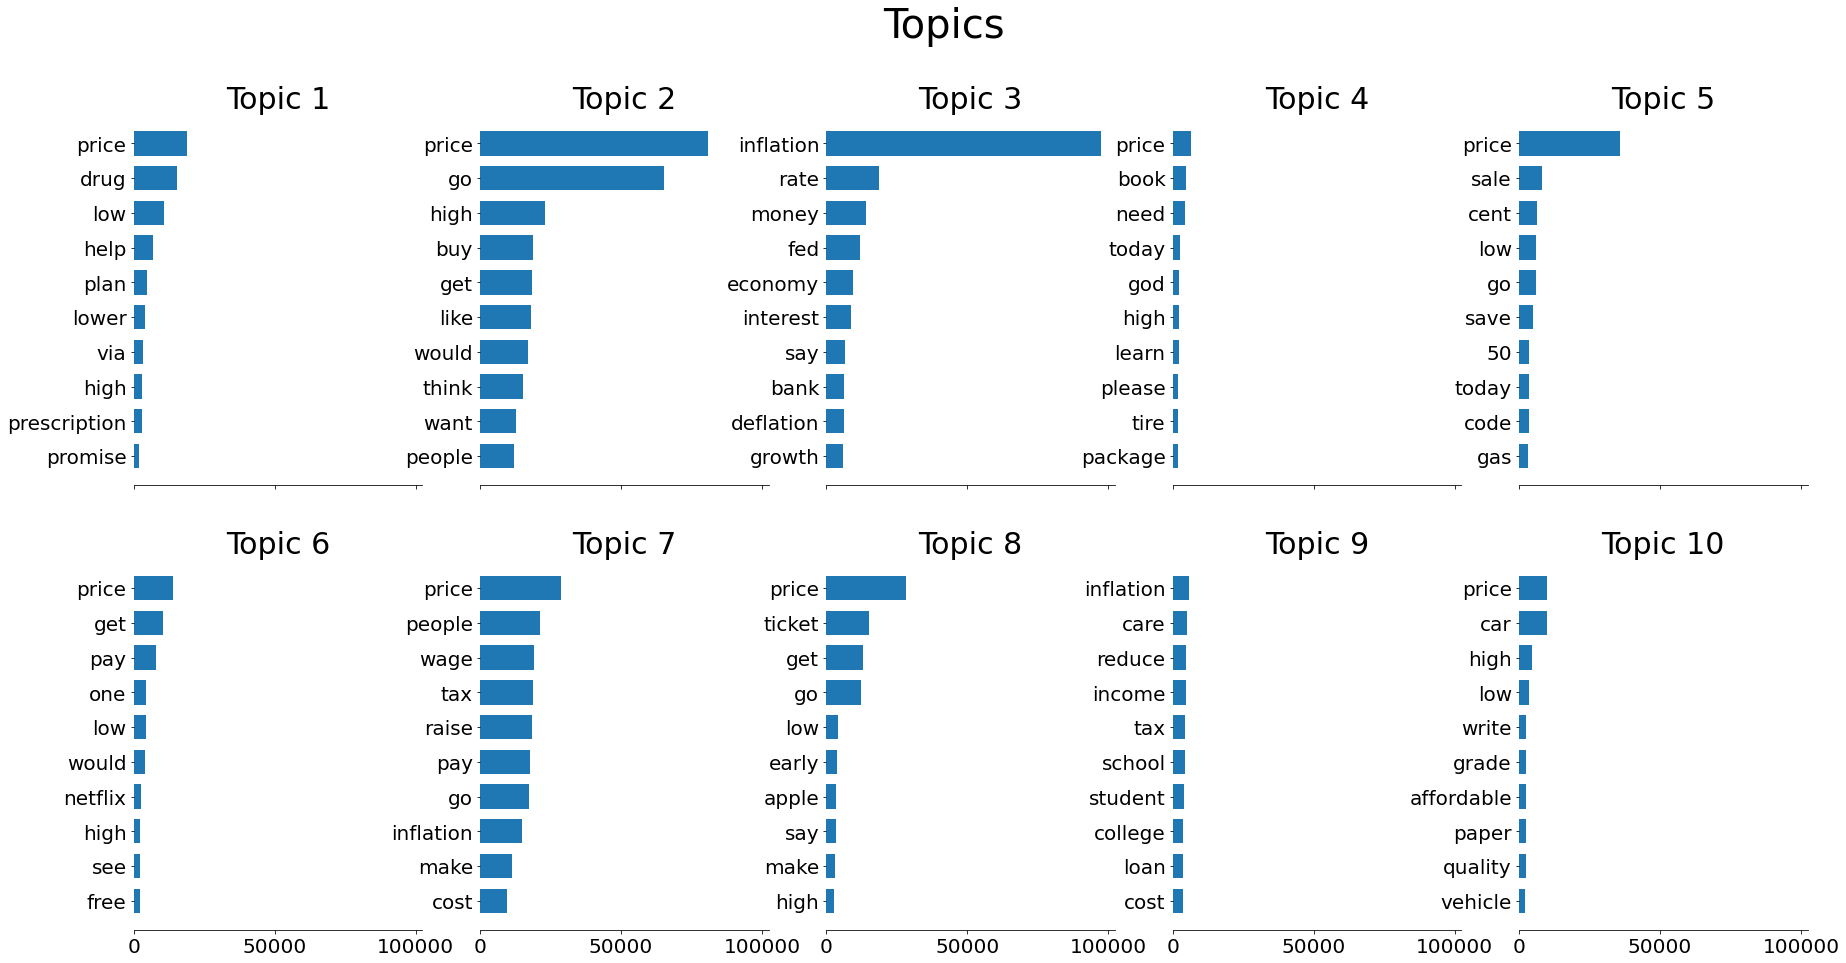

In [39]:
feat_names = vectorizer.get_feature_names_out()
n_top_words = 10
plot_top_words(res_lda, feat_names, n_top_words, 'Topics')

### WordClouds

In [ ]:
feat_names = vectorizer.get_feature_names_out()

list(get_weighted_words_topic(lda, feat_names))

In [110]:
# def get_weighted_words_topic(model, feature_names, n_top_words = 20):

#     for topic_idx, topic in enumerate(model.components_):
#         top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
#         top_features = [feature_names[i] for i in top_features_ind]
#         weights = topic[top_features_ind]

#         weighted_words = dict(zip(top_features, weights))

#         yield weighted_words

# def plot_word_cloud(weighted_words):

#     wordcloud = WordCloud(width = 800, height = 800,
#                           background_color ='white',
#                           min_font_size = 10).generate_from_frequencies(weighted_words)

#     plt.figure(figsize = (8, 8), facecolor = None)
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.tight_layout(pad = 0)

#     plt.show()

In [ ]:
for i in Utilities.get_weighted_words_topic(model, feature_names, n_top_words = 20):
    Utilities.plot_word_cloud(i)
    break

# Extract tweet with topics

In [ ]:
def add_topic_label(topic_matrix, df):

    df_topic_matrix = pd.DataFrame(topic_matrix)
    df_topic_matrix['Max'] = df_topic_matrix[df_topic_matrix.columns].idxmax(axis = 1)
    df['Max'] = df_topic_matrix['Max']

    return df1

def filter_by_topic(df, topic_number: float):
    return df[df['Max'] == topic_number]

In [ ]:
lda_topic_matrix = lda.transform(X)
df1_topic = add_topic_label(lda_topic_matrix, df1_lemmatized)

#### TOPICS:
- 2.0 : Inflation
- 12.0 : Financial market, trading
- 18.0 : Oil / Energy
- 26.0 : Bitcoin
- 30.0 : Real Estate

In [ ]:
# CREATE THE DF FILTERED BY TOPICS FOR THE MEN OF THE STREET
df_inflation_men = filter_by_topic(df1_topic, 2.0) 
df_financial_men = filter_by_topic(df1_topic, 12.0) 
df_energy_men = filter_by_topic(df1_topic, 18.0) 
df_bitcoin_men= filter_by_topic(df1_topic, 26.0) 
df_real_estate_men = filter_by_topic(df1_topic, 30.0) 

In [ ]:
df_inflation_men.to_csv('df_inflation_men.csv')
df_financial_men.to_csv('df_financial_men.csv')
df_energy_men.to_csv('df_energy_men.csv') 
df_bitcoin_men.to_csv('df_bitcoin_men.csv')
df_real_estate_men.to_csv('df_real_estate_men.csv')

In [ ]:
# CREATE THE DF FILTERED BY TOPICS FOR THE PROFESSIONALS
df_inflation_experts = filter_by_topic(df1_topic, 2.0) 
df_financial_experts = filter_by_topic(df1_topic, 12.0) 
df_energy_experts = filter_by_topic(df1_topic, 18.0) 
df_bitcoin_experts = filter_by_topic(df1_topic, 26.0) 
df_real_estate_experts = filter_by_topic(df1_topic, 30.0) 

In [ ]:
df_inflation_experts.to_csv('df_inflation_experts.csv')
df_financial_experts.to_csv('df_financial_experts.csv')
df_energy_experts.to_csv('df_energy_experts.csv') 
df_bitcoin_experts.to_csv('df_bitcoin_experts.csv')
df_real_estate_experts.to_csv('df_real_estate_experts.csv')